In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
# Generate N pairs of random values, separate x and y values
N = 100 
values = np.random.rand(100,2)
x,y = values[:,0], values[:,1]

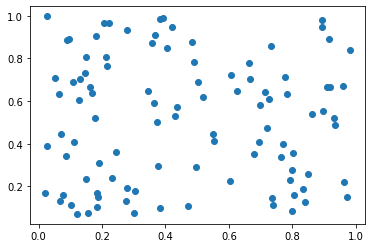

In [3]:
# Plot the points 
plt.scatter(x,y)
plt.show()

In [4]:
# Pick K random points as initial cluster for centroids  
k = 3 
random_choice = np.random.randint(100, size=(1,3))
centroids = values[random_choice][0]
random_choice = random_choice.tolist()[0]

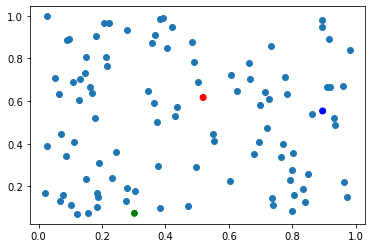

In [5]:
# Plot the highlighted centroids values
remVals = np.delete(values, random_choice,axis=0)
colors = ['r','g','b']
plt.scatter(remVals[:,0], remVals[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c=colors)
plt.show()

In [6]:
# Assign each point a centroid based on it's euclidian distance to nearest centroid
def dist(a,b):
    x1,y1 = a
    x2,y2 = b
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def distToPoints(values, centroids):
    dists = []
    for i in range(values.shape[0]):
        distance = float("inf")
        ix = 0
        for j in range(len(centroids)):
            if dist(values[i].tolist(), centroids[j]) < distance:
                distance = dist(values[i].tolist(), centroids[j])
                ix = j
        dists.append(ix)
    return dists
    
dists = distToPoints(values, centroids)

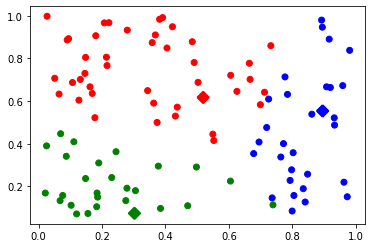

In [7]:
# Plot the data points assigned to each cluster
colors = ['red', 'green', 'blue']
plt.scatter(values[:,0], values[:,1], c=dists, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:,0], centroids[:,1], c=['r','g','b'], marker='x', linewidths=10)
plt.show()

In [8]:
# Update centroids based on clusters 
ix = np.asarray(dists)

def updateClusters(values, ix):
    centroids = []
    for i in range(k):

        # Extract the points in the given cluster
        clustIx = np.where(ix==i)[0]
        points = values[clustIx]

        # Calculate the new centroid 
        newX = sum(points[:,0])/len(points[:,0])
        newY = sum(points[:,1])/len(points[:,1])

        # Append 
        centroids.append([newX, newY])
    return np.asarray(centroids)

centroids = updateClusters(values, ix)

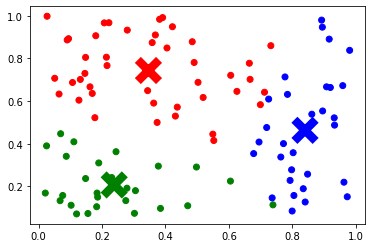

In [9]:
# Plot the new centroids 
# Plot the data points assigned to each cluster
colors = ['red', 'green', 'blue']
plt.scatter(values[:,0], values[:,1], c=dists, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:,0], centroids[:,1], c=['r','g','b'], marker='x', linewidths=30)
plt.show()

In [10]:
# Repeat above steps until no change in clusters
def isSame(x,y):
    return min(min((x==y).tolist()))
while True:
    ix = np.asarray(distToPoints(values, centroids))
    new_centroids = updateClusters(values, ix) 
    if isSame(centroids, new_centroids):
        break
    centroids = new_centroids

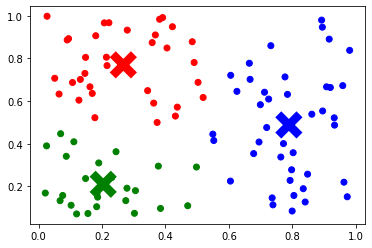

In [11]:
# Plot the new centroids 
# Plot the data points assigned to each cluster
colors = ['red', 'green', 'blue']
plt.scatter(values[:,0], values[:,1], c=ix, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:,0], centroids[:,1], c=['r','g','b'], marker='x', linewidths=30)
plt.show()

